In [275]:
import numpy as np
from sklearn.preprocessing import PolynomialFeatures
from sklearn.linear_model import LinearRegression, Lasso
from sklearn.pipeline import make_pipeline
from numpy.random import normal,uniform
import matplotlib.pyplot as plt
plt.style.use('ggplot')

def sample(f, sigma=.5, N=5):
    """choose N x values as a training set from the interval at random and return f(x)+n(0,sigma^2) as the data at
    that training set"""
    x = uniform(-1,1,size=(N,1))
    y = f(x)+normal(0,sigma,size=(N,1))
    return np.concatenate([x,y],axis=1)

def bias_variance_plot(degree=2,samples=20,training_set_size=10,truth=None,sigma=.5):   
    plt.figure(figsize=(20,20))
    if not truth:
        truth = lambda x: 0
    pipeline = make_pipeline(PolynomialFeatures(degree=degree),LinearRegression())
    _=plt.title("Fitting {} polynomials of degree {} to training sets of size {}\nsigma={}".format(samples,degree,training_set_size,sigma))
    x =np.linspace(-1,1,20)

    plt.ylim([-2,2])
    avg = np.zeros(x.shape)
    for i in range(samples):
        T= sample(truth,sigma=sigma,N=training_set_size)
        plt.scatter(T[:,0],T[:,1])
        model=pipeline.fit(T[:,0].reshape(-1,1),T[:,1])
        y = model.predict(x.reshape(-1,1))
        avg += y
        _=plt.plot(x,model.predict(x.reshape(-1,1)))
    _=plt.plot(x,avg/samples,color='black',label='mean predictor')
    _=plt.legend()

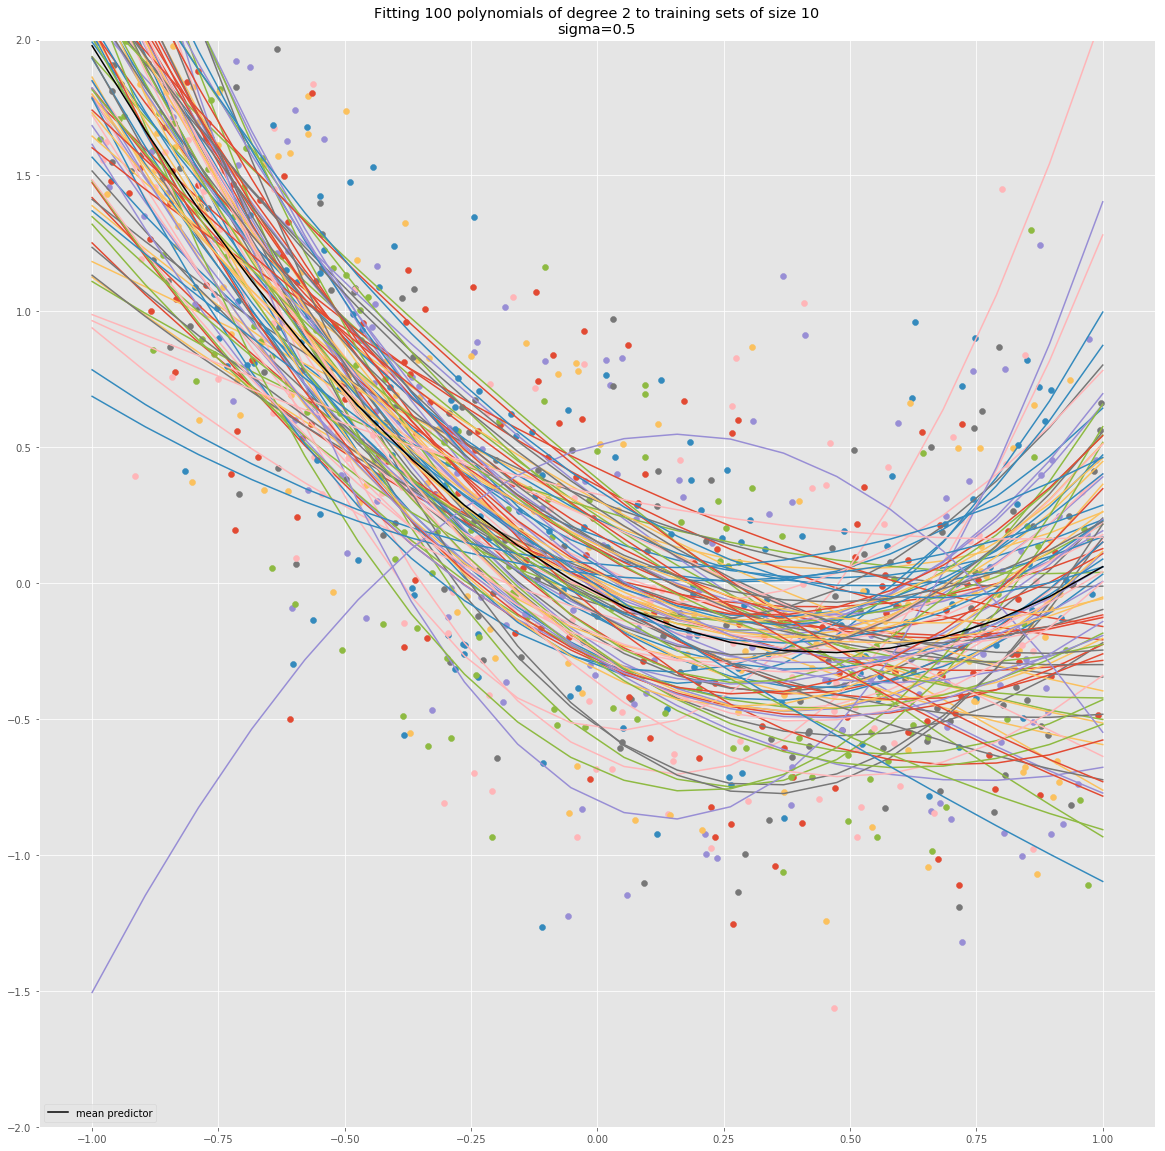

In [280]:
bias_variance_plot(2,training_set_size=10,samples=100,truth=lambda x: -x+x**2)

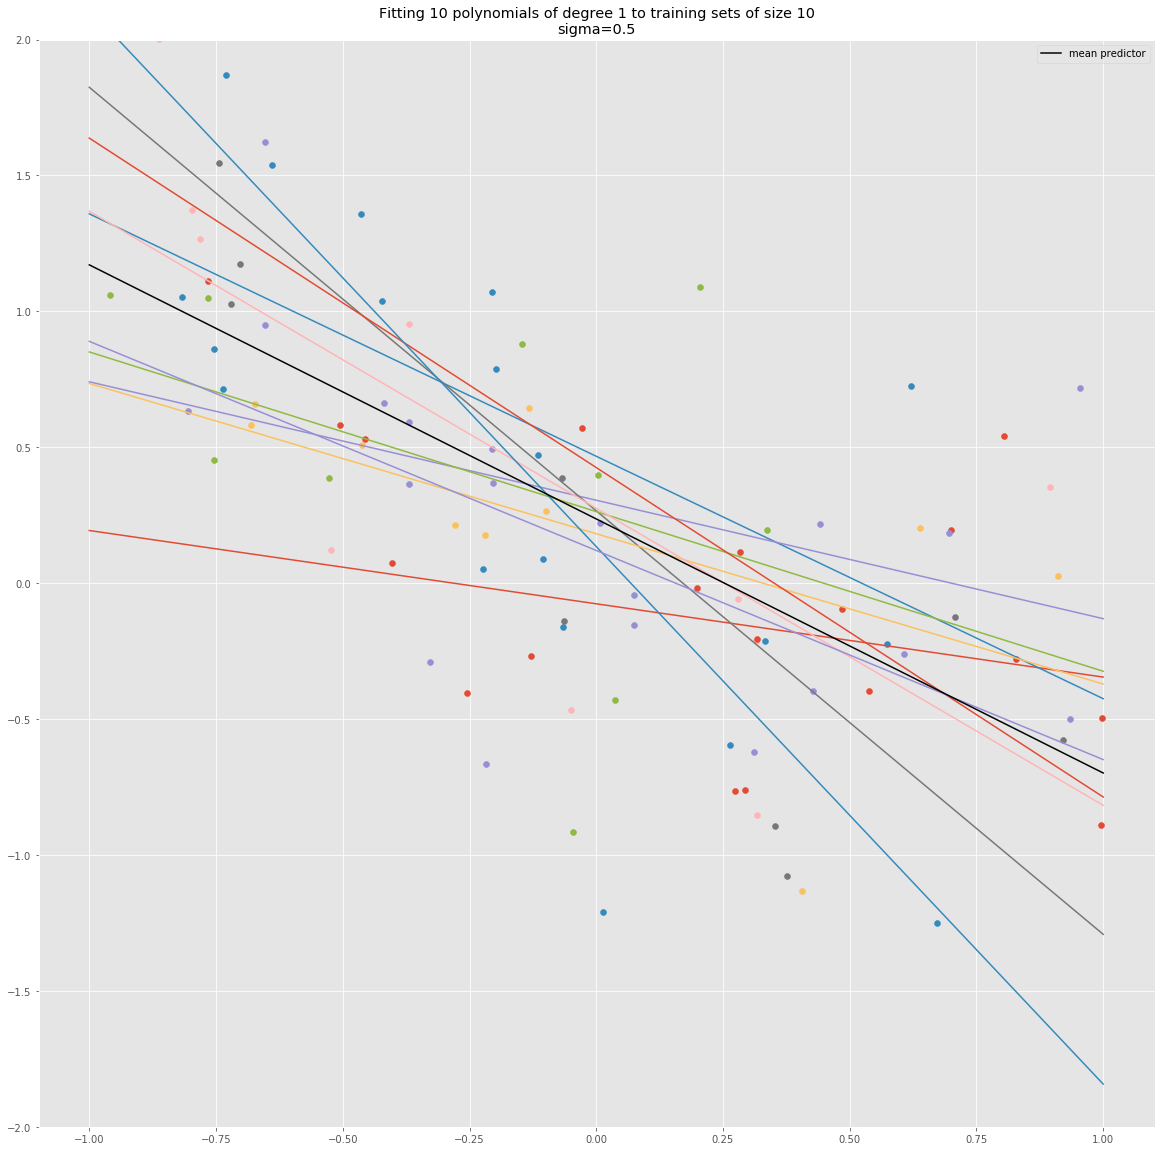

In [283]:
bias_variance_plot(1,training_set_size=10,samples=10,truth=lambda x: -x+x**2)

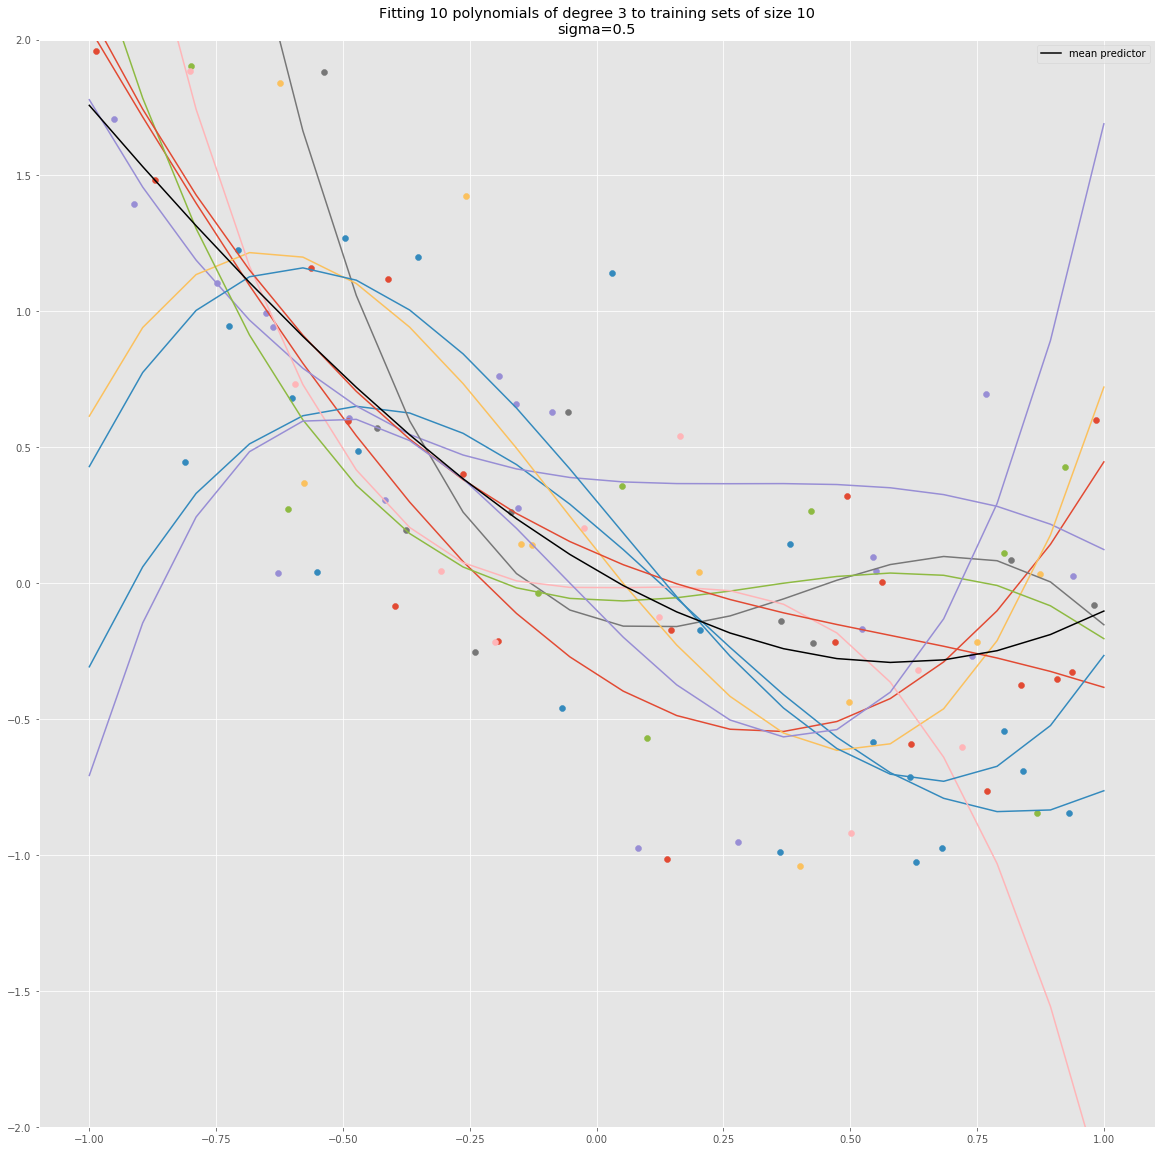

In [284]:
bias_variance_plot(3,training_set_size=10,samples=10,truth=lambda x: -x+x**2)